[*********************100%%**********************]  1 of 1 completed


AAPL Stock Data:
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2019-04-18  50.779999  51.037498  50.630001  50.965000  49.063942  96783200
2019-04-22  50.707500  51.235001  50.584999  51.132500  49.225204  77758000
2019-04-23  51.107498  51.937500  50.974998  51.869999  49.935192  93292000
2019-04-24  51.840000  52.119999  51.762501  51.790001  49.858181  70162400
2019-04-25  51.707500  51.939999  51.279999  51.320000  49.405704  74172800
8/8 [==============================] - 1s 39ms/step


ValueError: x and y must have same first dimension, but have shapes (191,) and (251,)

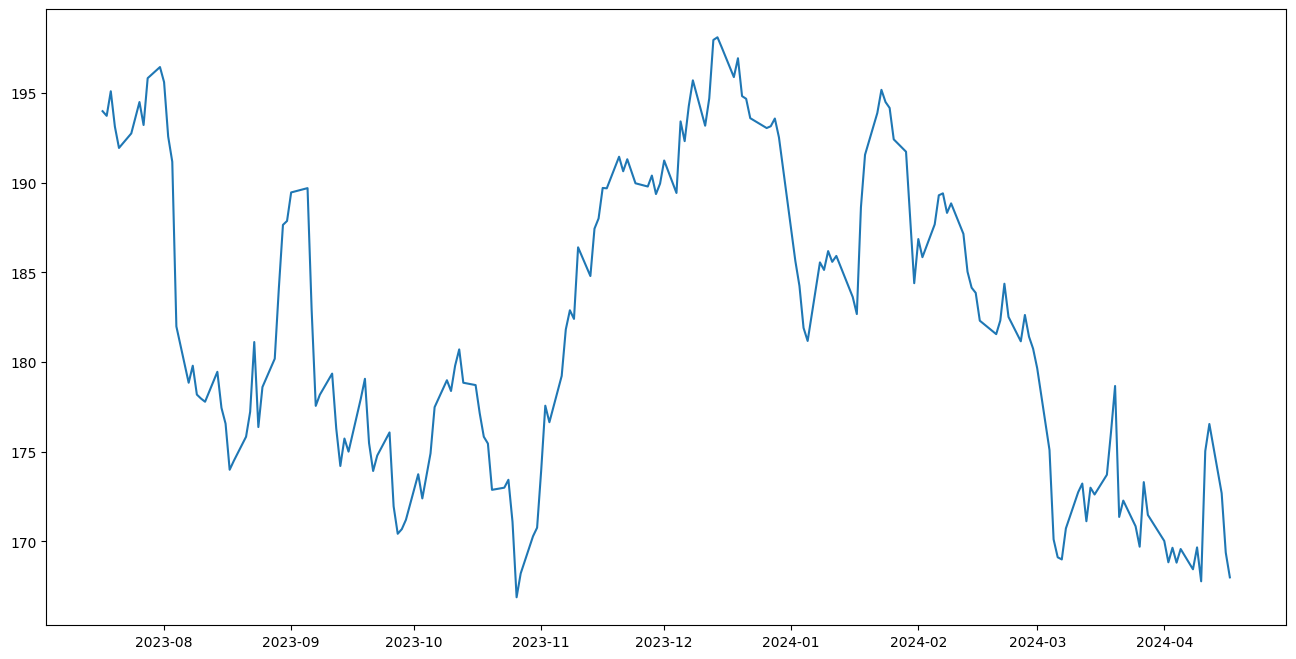

In [13]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Download AAPL stock data for the last five years
aapl_df = yf.download('AAPL', period='5y', interval='1d')

# Display the first few rows of the AAPL stock data
print("AAPL Stock Data:")
print(aapl_df.head())

# Use only the 'Close' column
data = aapl_df.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on (80% of the dataset)
training_data_len = int(np.ceil(len(dataset) * 0.8))

# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

# Create the training data set
train_data = scaled_data[0:int(training_data_len), :]

# Split the data into x_train and y_train datasets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data (LSTM expects the input to be 3-Dimensional in the form [samples, time steps, features])
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build the LSTM model
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)),
    LSTM(64, return_sequences=False),
    Dense(25),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

# Create the testing data set
test_data = scaled_data[training_data_len - 60: , :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the right number of dates for the x-axis (test_dates should align with predictions)
test_dates = aapl_df.index[training_data_len + 60:]

# Ensure the length of test_dates matches the number of predictions
test_dates = test_dates[:len(predictions)]

# Plot the data
plt.figure(figsize=(16,8))
plt.plot(test_dates, dataset[training_data_len + 60:, 0], label='Actual Price')  # Adjust slicing
plt.plot(test_dates, predictions.flatten(), label='Predicted Price')  # Flatten predictions to match dimensions
plt.title('AAPL Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
##5c using appl stock data from yahoo finace create and LSTM model with tensor Flow and Keras the code above uses tensor training and val loss to predict future appl stock


In [9]:
!pip install tensorflow

In [2]:
##2a I got my data from FRED to compare the United Kingdom and The united States in a couple different categories for the past 10 years I had no missing data but demonstrated what the code would be
#import pandas as pd

#def fill_missing_with_mean(df):
    # Identify non-date columns
   # non_date_columns = df.select_dtypes(include=[np.number]).columns.tolist()
    # Fill missing values with the mean of the column
    # for column in non_date_columns:
  #      df[column] = df[column].fillna(df[column].mean())
  #  return df

# Load your datasets
# country_a_data = pd.read_csv('/content/economicdata.csv', parse_dates=['observation_date'])
# country_b_data = pd.read_csv('/content/usecondata.csv', parse_dates=['Date.2'])

# Rename the date columns to have a consistent name across dataframes
# country_a_data.rename(columns={'observation_date': 'Date'}, inplace=True)
# country_b_data.rename(columns={'Date.2': 'Date'}, inplace=True)

# Apply the function to your datasets
# country_a_data = fill_missing_with_mean(country_a_data)
# country_b_data = fill_missing_with_mean(country_b_data)

# Save back to CSV if needed
# country_a_data.to_csv('/content/economicdata_filled.csv', index=False)
# country_b_data.to_csv('/content/usecondata_filled.csv', index=False)

##2b give code for this to put the mean in the csv for missing nan values in the dataset knowing that I am measuring gdp, stickyprice CPI and Unempoyment for different countries


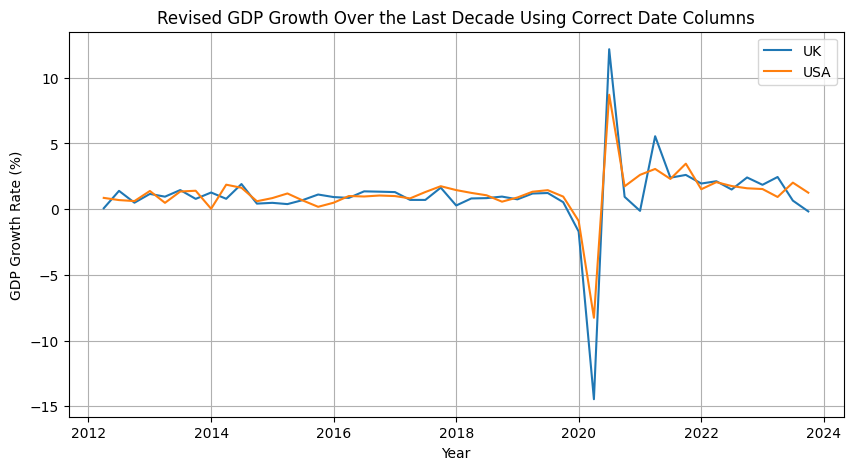

Summary Statistics for Country UK Data:
                  count                 mean                  min  \
Date                 48  2017-11-15 10:30:00  2012-01-01 00:00:00   
Stick Price CPI    48.0             1.678125                 0.25   
Unemployment Rate  48.0             5.279638             3.831278   
observation_date     48  2017-11-15 10:30:00  2012-01-01 00:00:00   
GDP                48.0         52741.514583              42470.4   
Disregard          48.0        527415.145833             424704.0   
Corpoate Tax Rate  12.0             0.205833                 0.19   
GDP Growth         47.0             1.042903           -14.461531   

                                   25%                  50%  \
Date               2014-12-09 00:00:00  2017-11-16 00:00:00   
Stick Price CPI                 0.6975                1.845   
Unemployment Rate             4.205087             4.839417   
observation_date   2014-12-09 00:00:00  2017-11-16 00:00:00   
GDP                    

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
country_a_data = pd.read_csv('/economicdata.csv', parse_dates=['observation_date'])
country_b_data = pd.read_csv('/usecondata.csv', parse_dates=['Date.2'])
# Use the correct date columns
country_a_data['Date'] = country_a_data['observation_date']
country_b_data['Date'] = country_b_data['Date.2']

# Filter out null values in GDP and Date
country_a_data = country_a_data[country_a_data['GDP'].notnull() & country_a_data['Date'].notnull()]
country_b_data = country_b_data[country_b_data['GDP'].notnull() & country_b_data['Date'].notnull()]

# Calculate yearly GDP growth rate as percentage change
country_a_data['GDP Growth'] = country_a_data['GDP'].pct_change() * 100
country_b_data['GDP Growth'] = country_b_data['GDP'].pct_change() * 100

# Plotting the revised data
plt.figure(figsize=(10, 5))
sns.lineplot(x=country_a_data['Date'], y=country_a_data['GDP Growth'], label='UK')
sns.lineplot(x=country_b_data['Date'], y=country_b_data['GDP Growth'], label='USA')
plt.title('Revised GDP Growth Over the Last Decade Using Correct Date Columns')
plt.xlabel('Year')
plt.ylabel('GDP Growth Rate (%)')
plt.legend()
plt.grid(True)
plt.show()

def calc_stats(data):
    mean = data['GDP Growth'].mean()
    median = data['GDP Growth'].median()
    std_dev = data['GDP Growth'].std()
    return mean, median, std_dev

# Recalculate statistics for both countries
stats_a_revised = calc_stats(country_a_data)
stats_b_revised = calc_stats(country_b_data)

stats_a_revised, stats_b_revised

# Recalculate statistics
stats_a_revised = calc_stats(country_a_data)
stats_b_revised = calc_stats(country_b_data)

stats_a_revised, stats_b_revised

# Function to calculate summary statistics
def calculate_summary_stats(data, column_name):
    mean = data[column_name].mean()
    median = data[column_name].median()
    std_dev = data[column_name].std()
    return mean, median, std_dev

summary_stats_a = country_a_data.describe().transpose()
summary_stats_b = country_b_data.describe().transpose()

# Print summary statistics
print("Summary Statistics for Country UK Data:")
print(summary_stats_a)

print("\nSummary Statistics for Country USA Data:")
print(summary_stats_b)
#3a print the summary statistics and compare the change in GDP for these two csv files